# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib.request,urllib.parse,urllib.error
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#set counts for printing of records
count = 0
group = 1
city_list = []

#create loop for data to generate dataframe
print("------------------------------\nBegin Data Retrieval\n------------------------------\n")

for city in cities:
    count += 1
    
    print(f"Processing record {count} of Set {group} | {city}")
    
    if count == 50:
        count = 0
        group += 1
   
    url= f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=Imperial"
    response = requests.get(url).json()
    
    try:
        city_list.append({
            'City': city,
            'Lat': response['coord']['lat'],
            'Lon':response['coord']['lon'],
            'Maximum Temp': response['main']['temp_max'],
            'Humidity': response['main']['humidity'],
            'Cloudiness': response['clouds']['all'],
            'Wind': response['wind']['speed'],
            'Country': response['sys']['country'],
            'Date': response['dt']
        })
    
    except Exception:
        print("City not found. Skipping...")
        pass
print("------------------------------\nRetrieval of Data: Completed\n------------------------------")        

------------------------------
Begin Data Retrieval
------------------------------

Processing record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing record 3 of Set 1 | busselton
Processing record 4 of Set 1 | hilo
Processing record 5 of Set 1 | tamandare
Processing record 6 of Set 1 | tasiilaq
Processing record 7 of Set 1 | tiksi
Processing record 8 of Set 1 | hermanus
Processing record 9 of Set 1 | bluff
Processing record 10 of Set 1 | hobart
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | thompson
Processing record 13 of Set 1 | olafsvik
Processing record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing record 15 of Set 1 | rexburg
Processing record 16 of Set 1 | punta arenas
Processing record 17 of Set 1 | kaitangata
Processing record 18 of Set 1 | new norfolk
Processing record 19 of Set 1 | atuona
Processing record 20 of Set 1 | astana
Processing record 21 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_data = pd.DataFrame(city_list)
weather_data

,City,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Country,Date
0,busselton,-33.6500,115.3333,59.00,95,100,1.01,AU,1612637701
1,hilo,19.7297,-155.0900,70.00,63,1,5.75,US,1612637456
2,tamandare,-8.7597,-35.1047,83.26,64,54,11.43,BR,1612637588
3,tasiilaq,65.6145,-37.6368,32.00,80,75,43.73,GL,1612637702
4,tiksi,71.6872,128.8694,-25.46,86,100,5.97,RU,1612637492
...,...,...,...,...,...,...,...,...,...
556,coromandel,-18.4733,-47.2003,77.14,82,100,7.70,BR,1612637787
557,okha,53.5739,142.9478,-0.92,93,99,12.68,RU,1612637787
558,fallon,39.4735,-118.7774,46.00,52,20,6.91,US,1612637788
559,sonkovo,57.7782,37.1571,-2.90,92,100,10.96,RU,1612637788


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [31]:
#Use describe function to see values for setting limits
weather_data.describe()

,Lat,Lon,Maximum Temp,Humidity,Cloudiness,Wind,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.826783,13.082676,50.257950,70.992870,52.588235,8.425455,1.612638e+09
std,32.893309,89.643442,32.835557,20.652567,40.536973,6.247501,9.113269e+01
min,-54.800000,-179.166700,-41.440000,8.000000,0.000000,0.160000,1.612637e+09
25%,-5.226900,-65.102300,32.000000,61.000000,3.000000,3.800000,1.612638e+09
50%,28.131000,15.640100,59.990000,78.000000,66.000000,6.910000,1.612638e+09
75%,49.783400,88.397200,76.910000,87.000000,93.000000,11.500000,1.612638e+09
max,78.218600,179.316700,98.420000,100.000000,100.000000,57.000000,1.612638e+09


## Latitude vs. Temperature Plot

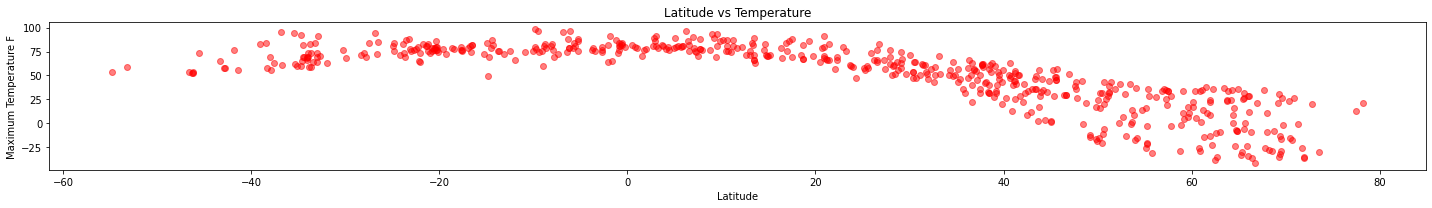

In [39]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(20,3))
plt.scatter(weather_data["Lat"], weather_data["Maximum Temp"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature F")
plt.tight_layout()
plt.savefig("../Output/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

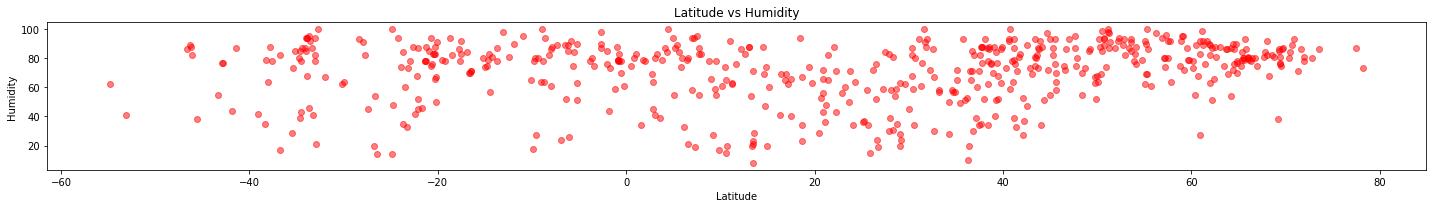

In [40]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(20,3))
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.tight_layout()
plt.savefig("../Output/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

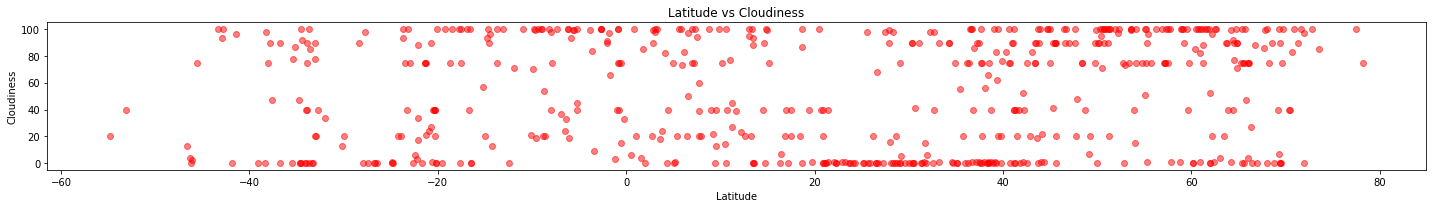

In [41]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(20,3))
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.tight_layout()
plt.savefig("../Output/lat_vs_clouds.png")
plt.show()

## Latitude vs. Wind Speed Plot

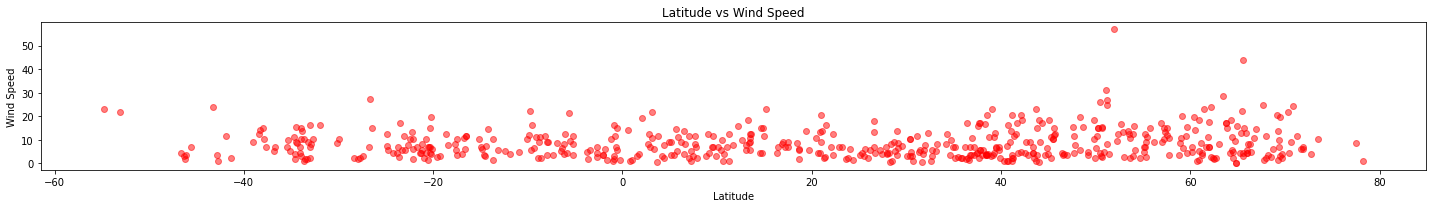

In [43]:
# Set maximum x value 
x_limit = 80
plt.figure(figsize=(20,3))
plt.scatter(weather_data["Lat"], weather_data["Wind"], color='r', alpha=0.5)

#Add title and labels
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.tight_layout()
plt.savefig("../Output/lat_vs_wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression